In [2]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd
import scipy

import warnings
warnings.filterwarnings("ignore")

In [10]:
"""N = 2
M = 10

initial_hamiltonian = construct_hamiltonian(N, M, V = 0, mu = 10, J = 0)
quenched_hamitlonian = construct_hamiltonian(N, M, V = 0, mu = 0, J = 10)

times = np.linspace(0,1,100)

hamiltonians = [initial_hamiltonian]
hamiltonians += [quenched_hamitlonian for _ in times[:-1]]

energies, time_evolved_wavefunctions, state_probabilities, state_overlaps, true_energies, ground_state_manifold_overlaps = simulate_hamiltonian_time_evolution(hamiltonians, times)

for state in time_evolved_wavefunctions:
    states, _ = enumerate_states(N, M)
    exp_values = np.zeros((M, N))
    dim = M**N
    for site_index in range(N):
        for synth_level in range(M):
            exp_value = 0
            for k in range(dim):
                if states[k][site_index] == synth_level:
                    exp_value += np.abs(state[k])**2
            exp_values[synth_level, site_index] = exp_value

    # Plotting
    fig, ax = plt.subplots()
    cax = ax.imshow(exp_values, origin='lower', cmap='viridis', vmin=0, vmax=1,
                    extent=[-0.5, N-0.5, -0.5, M-0.5], aspect='auto')

    ax.set_xticks(range(N))
    ax.set_yticks(range(M))
    ax.set_xlabel('Site index')
    ax.set_ylabel('Synthetic level')
    ax.set_title('Occupation Expectation Values')

    fig.colorbar(cax, label='Occupation Probability')
    plt.show()"""

"N = 2\nM = 10\n\ninitial_hamiltonian = construct_hamiltonian(N, M, V = 0, mu = 10, J = 0)\nquenched_hamitlonian = construct_hamiltonian(N, M, V = 0, mu = 0, J = 10)\n\ntimes = np.linspace(0,1,100)\n\nhamiltonians = [initial_hamiltonian]\nhamiltonians += [quenched_hamitlonian for _ in times[:-1]]\n\nenergies, time_evolved_wavefunctions, state_probabilities, state_overlaps, true_energies, ground_state_manifold_overlaps = simulate_hamiltonian_time_evolution(hamiltonians, times)\n\nfor state in time_evolved_wavefunctions:\n    states, _ = enumerate_states(N, M)\n    exp_values = np.zeros((M, N))\n    dim = M**N\n    for site_index in range(N):\n        for synth_level in range(M):\n            exp_value = 0\n            for k in range(dim):\n                if states[k][site_index] == synth_level:\n                    exp_value += np.abs(state[k])**2\n            exp_values[synth_level, site_index] = exp_value\n\n    # Plotting\n    fig, ax = plt.subplots()\n    cax = ax.imshow(exp_values

In [11]:
"""states, _ = enumerate_states(N, M)
exp_values = np.zeros((M, N))
dim = M**N
for site_index in range(N):
    for synth_level in range(M):
        exp_value = 0
        for k in range(dim):
            if states[k][site_index] == synth_level:
                exp_value += np.abs(ground_state[k])**2
        exp_values[synth_level, site_index] = exp_value

# Plotting
fig, ax = plt.subplots()
cax = ax.imshow(exp_values, origin='lower', cmap='viridis', vmin=0, vmax=1,
                extent=[-0.5, N-0.5, -0.5, M-0.5], aspect='auto')

ax.set_xticks(range(N))
ax.set_yticks(range(M))
ax.set_xlabel('Site index')
ax.set_ylabel('Synthetic level')
ax.set_title('Occupation Expectation Values')

fig.colorbar(cax, label='Occupation Probability')
plt.show()"""

"states, _ = enumerate_states(N, M)\nexp_values = np.zeros((M, N))\ndim = M**N\nfor site_index in range(N):\n    for synth_level in range(M):\n        exp_value = 0\n        for k in range(dim):\n            if states[k][site_index] == synth_level:\n                exp_value += np.abs(ground_state[k])**2\n        exp_values[synth_level, site_index] = exp_value\n\n# Plotting\nfig, ax = plt.subplots()\ncax = ax.imshow(exp_values, origin='lower', cmap='viridis', vmin=0, vmax=1,\n                extent=[-0.5, N-0.5, -0.5, M-0.5], aspect='auto')\n\nax.set_xticks(range(N))\nax.set_yticks(range(M))\nax.set_xlabel('Site index')\nax.set_ylabel('Synthetic level')\nax.set_title('Occupation Expectation Values')\n\nfig.colorbar(cax, label='Occupation Probability')\nplt.show()"

In [12]:
N = 3
M = 3

states, _ = enumerate_states(N, M)

Text(0, 0.5, '$\\langle \\sigma \\rangle$')

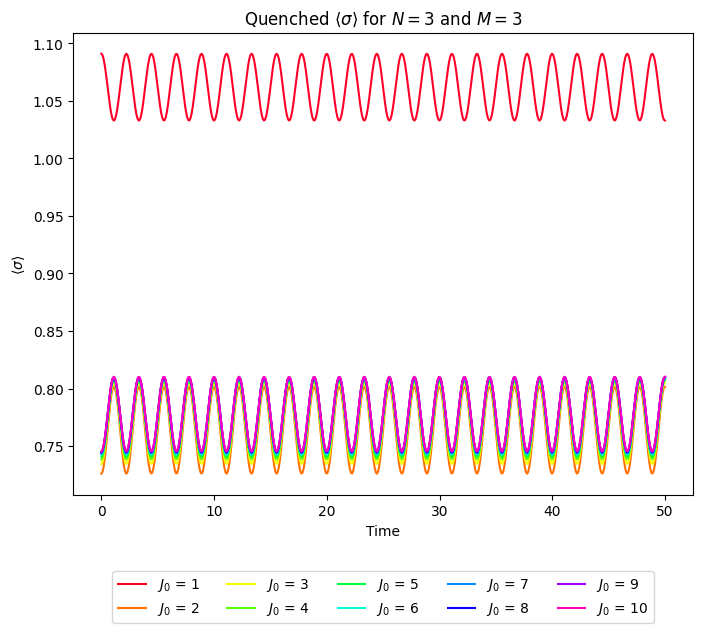

In [ ]:
"""times = np.linspace(0, 50, 500)
initial_J_strengths = np.arange(1,11,1)
colors = get_cmap("gist_rainbow", len(initial_J_strengths))

fig, ax = plt.subplots(figsize = (8,6))
for idx, initial_J_strength in enumerate(initial_J_strengths): 
    initial_hamiltonian = construct_hamiltonian(N, M, V = 1, mu = 0, J = initial_J_strength)
    quenched_hamiltonian = construct_hamiltonian(N, M, V = 1, mu = 0, J = 0)
    
    hamiltonians = [initial_hamiltonian]
    hamiltonians += [quenched_hamiltonian for _ in times[1:]]

    energies, time_evolved_wavefunctions, state_probabilities, state_overlaps, true_energies, ground_state_manifold_overlaps = simulate_hamiltonian_time_evolution(hamiltonians, times)
    
    sigmas = []
    for i, state in enumerate(time_evolved_wavefunctions):
        sigma = sigma_ij(N//2-1, N//2, state, states, N, M)
        sigmas += [sigma]
    ax.plot(times, sigmas, color = colors(idx), label = f"$J_0$ = {np.round(initial_J_strength,3)}")
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncols=5)
ax.set_title(f"Quenched $\langle \sigma \\rangle$ for $N = {N}$ and $M = {M}$")
ax.set_xlabel("Time")
ax.set_ylabel("$\langle \sigma \\rangle$")
"""

Text(0, 0.5, '$\\langle \\sigma \\rangle$')

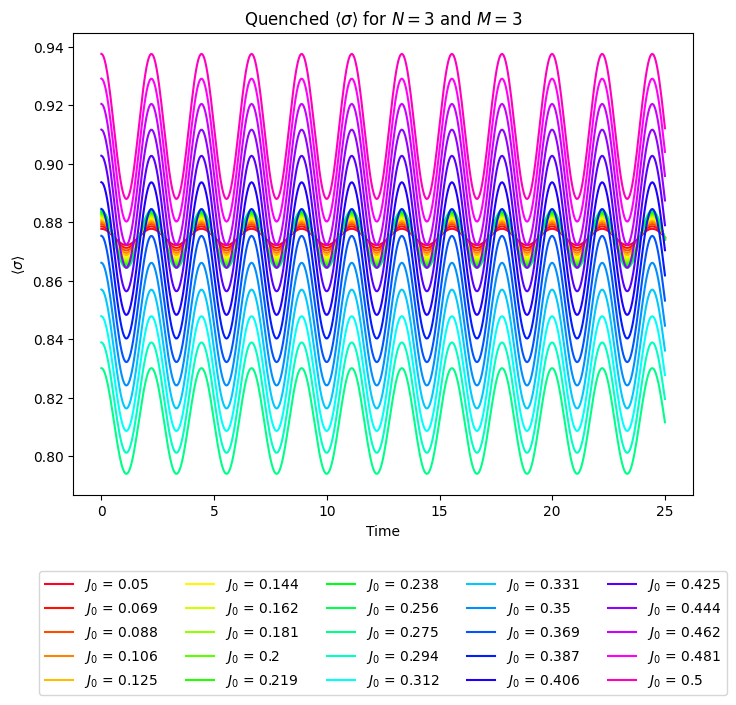

In [ ]:
"""times = np.linspace(0, 25, 500)
initial_J_strengths = np.linspace(0.05,0.5,25)
colors = get_cmap("gist_rainbow", len(initial_J_strengths))

fig, ax = plt.subplots(figsize = (8,6))
for idx, initial_J_strength in enumerate(initial_J_strengths): 
    initial_hamiltonian = construct_hamiltonian(N, M, V = 1, mu = 0, J = initial_J_strength)
    quenched_hamiltonian = construct_hamiltonian(N, M, V = 1, mu = 0, J = 0)
    
    hamiltonians = [initial_hamiltonian]
    hamiltonians += [quenched_hamiltonian for _ in times[1:]]

    energies, time_evolved_wavefunctions, state_probabilities, state_overlaps, true_energies, ground_state_manifold_overlaps = simulate_hamiltonian_time_evolution(hamiltonians, times)
    
    sigmas = []
    for i, state in enumerate(time_evolved_wavefunctions):
        sigma = sigma_ij(N//2-1, N//2, state, states, N, M)
        sigmas += [sigma]
    ax.plot(times, sigmas, color = colors(idx), label = f"$J_0$ = {np.round(initial_J_strength,3)}")
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncols=5)
ax.set_title(f"Quenched $\langle \sigma \\rangle$ for $N = {N}$ and $M = {M}$")
ax.set_xlabel("Time")
ax.set_ylabel("$\langle \sigma \\rangle$")
"""

Text(0, 0.5, 'Time')

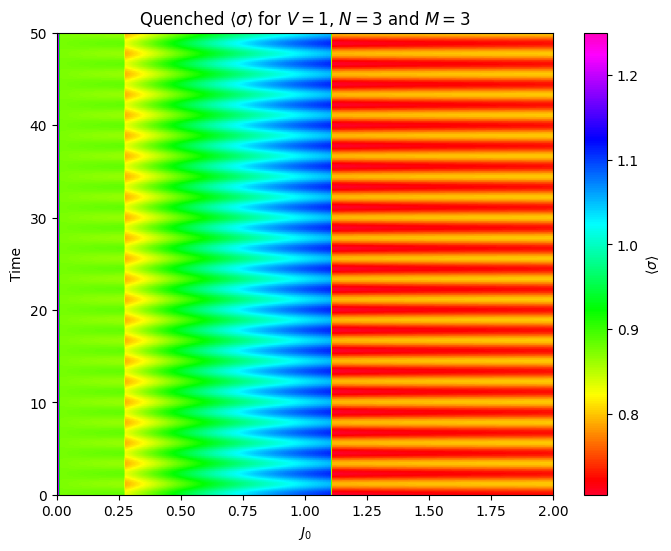

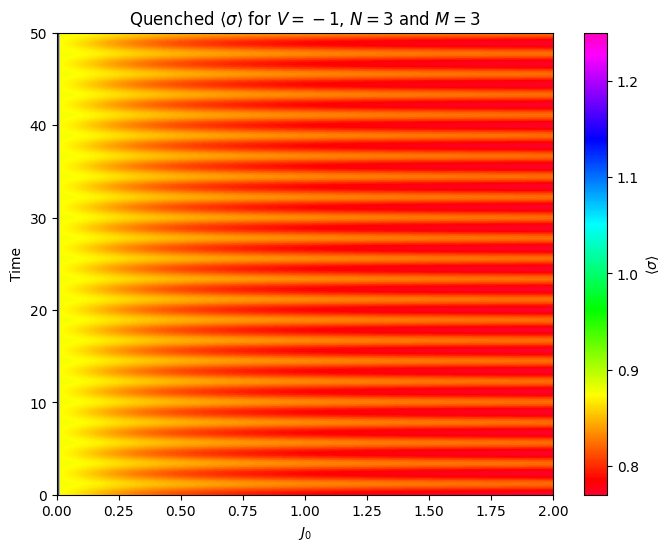

In [19]:
times = np.linspace(0, 50, 250)
initial_J_strengths = np.linspace(0, 2, 250)

N = 3
M = 3
states, _ = enumerate_states(N, M)

# positive V

V = 1

sigma_matrix = np.zeros((len(times), len(initial_J_strengths)))

for j_idx, initial_J_strength in enumerate(initial_J_strengths):
    initial_hamiltonian = construct_hamiltonian(N, M, V=V, mu=0, J=initial_J_strength)
    quenched_hamiltonian = construct_hamiltonian(N, M, V=V, mu=0, J=0)

    hamiltonians = [initial_hamiltonian] + [quenched_hamiltonian] * (len(times) - 1)

    energies, time_evolved_wavefunctions, state_probabilities, state_overlaps, true_energies, ground_state_manifold_overlaps = simulate_hamiltonian_time_evolution(
        hamiltonians, times)

    for t_idx, state in enumerate(time_evolved_wavefunctions):
        sigma_matrix[t_idx, j_idx] = sigma_ij(N//2-1, N//2, state, states, N, M)

fig, ax = plt.subplots(figsize=(8, 6))
c = ax.imshow(sigma_matrix, aspect='auto', origin='lower',
              extent=[initial_J_strengths[0], initial_J_strengths[-1], times[0], times[-1]],
              cmap='gist_rainbow')

fig.colorbar(c, ax=ax, label=r'$\langle \sigma \rangle$')
ax.set_title(f"Quenched $\langle \sigma \\rangle$ for $V = {V}$, $N = {N}$ and $M = {M}$")
ax.set_xlabel(r'$J_0$')
ax.set_ylabel("Time")

# negative V

V = -1

sigma_matrix = np.zeros((len(times), len(initial_J_strengths)))

for j_idx, initial_J_strength in enumerate(initial_J_strengths):
    initial_hamiltonian = construct_hamiltonian(N, M, V=V, mu=0, J=initial_J_strength)
    quenched_hamiltonian = construct_hamiltonian(N, M, V=V, mu=0, J=0)

    hamiltonians = [initial_hamiltonian] + [quenched_hamiltonian] * (len(times) - 1)

    energies, time_evolved_wavefunctions, state_probabilities, state_overlaps, true_energies, ground_state_manifold_overlaps = simulate_hamiltonian_time_evolution(
        hamiltonians, times)

    for t_idx, state in enumerate(time_evolved_wavefunctions):
        sigma_matrix[t_idx, j_idx] = sigma_ij(N//2-1, N//2, state, states, N, M)

fig, ax = plt.subplots(figsize=(8, 6))
c = ax.imshow(sigma_matrix, aspect='auto', origin='lower',
              extent=[initial_J_strengths[0], initial_J_strengths[-1], times[0], times[-1]],
              cmap='gist_rainbow')

fig.colorbar(c, ax=ax, label=r'$\langle \sigma \rangle$')
ax.set_title(f"Quenched $\langle \sigma \\rangle$ for $V = {V}$, $N = {N}$ and $M = {M}$")
ax.set_xlabel(r'$J_0$')
ax.set_ylabel("Time")



In [17]:
"""from matplotlib.animation import FuncAnimation

N = 3
M = 3

initial_hamiltonian = construct_hamiltonian(N, M, V=1, mu=10, J=0)
quenched_hamiltonian = construct_hamiltonian(N, M, V=1, mu=0, J=10)

times = np.linspace(0, 10, 1000)

hamiltonians = [initial_hamiltonian]
hamiltonians += [quenched_hamiltonian for _ in times[1:]]

energies, time_evolved_wavefunctions, state_probabilities, state_overlaps, true_energies, ground_state_manifold_overlaps = simulate_hamiltonian_time_evolution(hamiltonians, times)

states, _ = enumerate_states(N, M)
dim = M**N

# Set up figure and axis
fig, ax = plt.subplots()
cax = ax.imshow(np.zeros((M, N)), origin='lower', cmap='viridis', vmin=0, vmax=1,
                extent=[-0.5, N - 0.5, -0.5, M - 0.5], aspect='auto')
ax.set_xticks(range(N))
ax.set_yticks(range(M))
ax.set_xlabel('Site index')
ax.set_ylabel('Synthetic level')
ax.set_title('Occupation Expectation Values')

fig.colorbar(cax, label='Occupation Probability')

def update(frame):
    state = time_evolved_wavefunctions[frame]
    exp_values = np.zeros((M, N))
    for site_index in range(N):
        for synth_level in range(M):
            exp_value = 0
            for k in range(dim):
                if states[k][site_index] == synth_level:
                    exp_value += np.abs(state[k])**2
            exp_values[synth_level, site_index] = exp_value
    cax.set_data(exp_values)
    ax.set_title(f'$t=${times[frame]:.2f}')
    return cax,

ani = FuncAnimation(fig, update, frames=len(times), blit=True, interval=300)
ani.save('occupation_animation.gif', writer='pillow', fps=30)
plt.show()"""

"from matplotlib.animation import FuncAnimation\n\nN = 3\nM = 3\n\ninitial_hamiltonian = construct_hamiltonian(N, M, V=1, mu=10, J=0)\nquenched_hamiltonian = construct_hamiltonian(N, M, V=1, mu=0, J=10)\n\ntimes = np.linspace(0, 10, 1000)\n\nhamiltonians = [initial_hamiltonian]\nhamiltonians += [quenched_hamiltonian for _ in times[1:]]\n\nenergies, time_evolved_wavefunctions, state_probabilities, state_overlaps, true_energies, ground_state_manifold_overlaps = simulate_hamiltonian_time_evolution(hamiltonians, times)\n\nstates, _ = enumerate_states(N, M)\ndim = M**N\n\n# Set up figure and axis\nfig, ax = plt.subplots()\ncax = ax.imshow(np.zeros((M, N)), origin='lower', cmap='viridis', vmin=0, vmax=1,\n                extent=[-0.5, N - 0.5, -0.5, M - 0.5], aspect='auto')\nax.set_xticks(range(N))\nax.set_yticks(range(M))\nax.set_xlabel('Site index')\nax.set_ylabel('Synthetic level')\nax.set_title('Occupation Expectation Values')\n\nfig.colorbar(cax, label='Occupation Probability')\n\ndef u

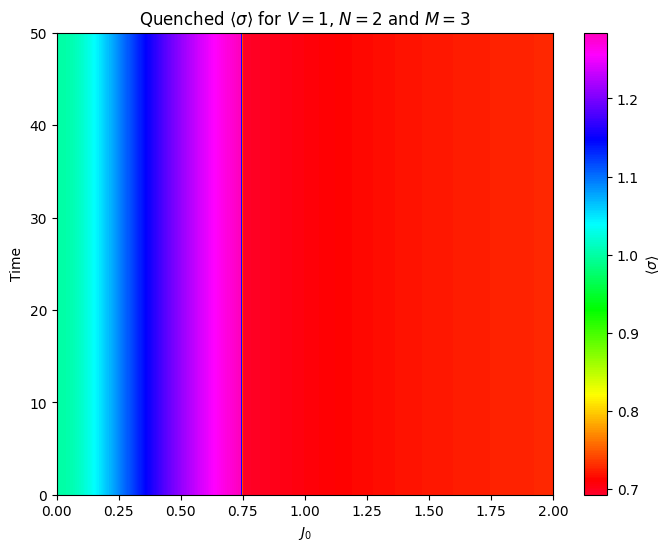

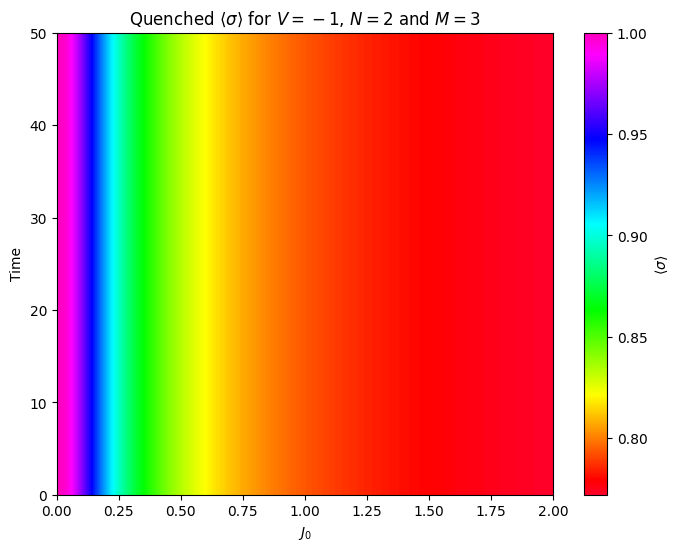

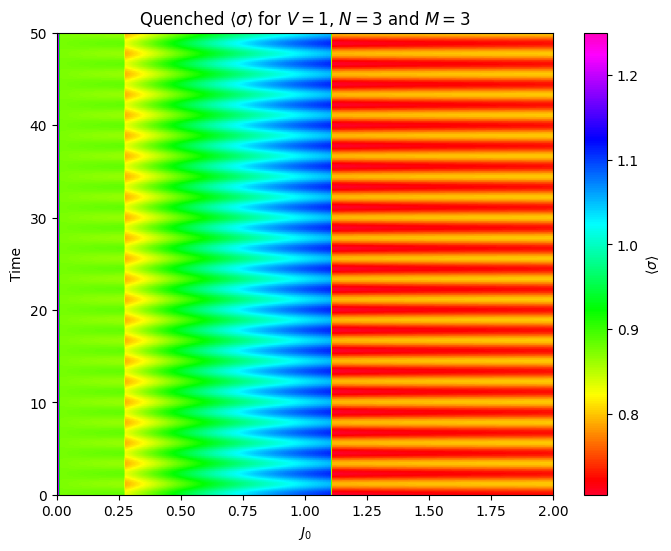

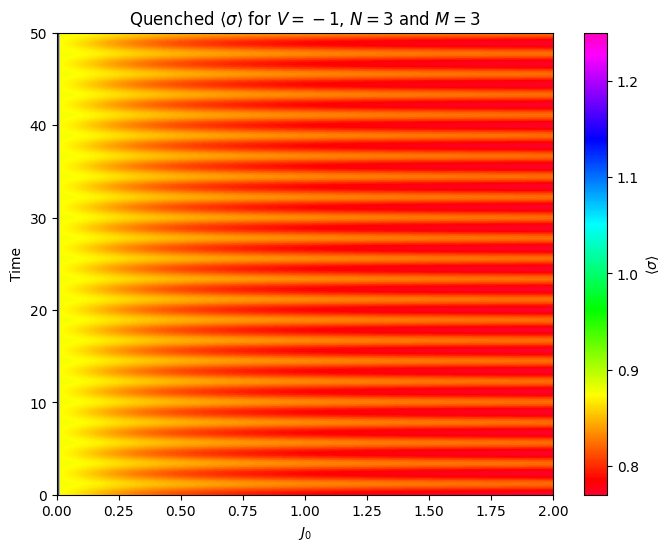

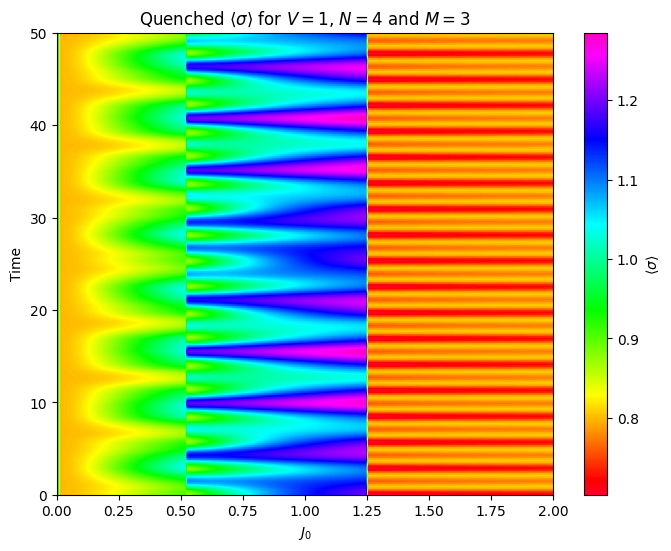

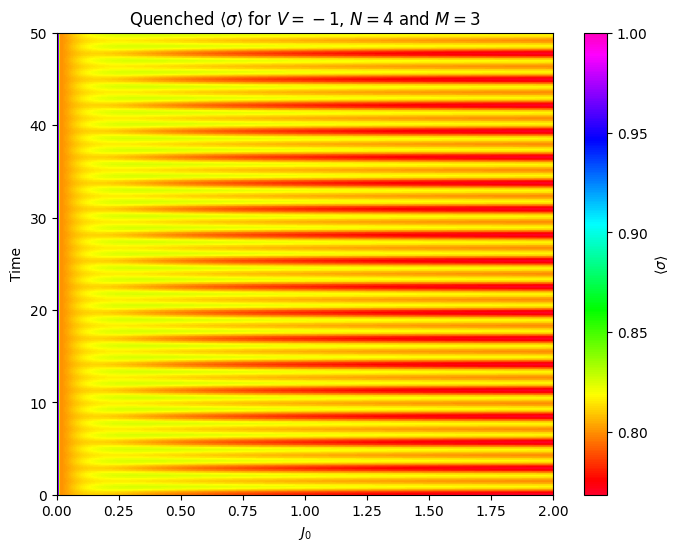

In [24]:
times = np.linspace(0, 50, 250)
initial_J_strengths = np.linspace(0, 2, 250)

M = 3

for N in [2,3,4]:

    states, _ = enumerate_states(N, M)

    # positive V

    V = 1

    sigma_matrix = np.zeros((len(times), len(initial_J_strengths)))

    for j_idx, initial_J_strength in enumerate(initial_J_strengths):
        initial_hamiltonian = construct_hamiltonian(N, M, V=V, mu=0, J=initial_J_strength)
        quenched_hamiltonian = construct_hamiltonian(N, M, V=V, mu=0, J=0)

        hamiltonians = [initial_hamiltonian] + [quenched_hamiltonian] * (len(times) - 1)

        energies, time_evolved_wavefunctions, state_probabilities, state_overlaps, true_energies, ground_state_manifold_overlaps = simulate_hamiltonian_time_evolution(
            hamiltonians, times)

        for t_idx, state in enumerate(time_evolved_wavefunctions):
            sigma_matrix[t_idx, j_idx] = sigma_ij(N//2-1, N//2, state, states, N, M)

    fig, ax = plt.subplots(figsize=(8, 6))
    c = ax.imshow(sigma_matrix, aspect='auto', origin='lower',
                extent=[initial_J_strengths[0], initial_J_strengths[-1], times[0], times[-1]],
                cmap='gist_rainbow')

    fig.colorbar(c, ax=ax, label=r'$\langle \sigma \rangle$')
    ax.set_title(f"Quenched $\langle \sigma \\rangle$ for $V = {V}$, $N = {N}$ and $M = {M}$")
    ax.set_xlabel(r'$J_0$')
    ax.set_ylabel("Time")

    # negative V

    V = -1

    sigma_matrix = np.zeros((len(times), len(initial_J_strengths)))

    for j_idx, initial_J_strength in enumerate(initial_J_strengths):
        initial_hamiltonian = construct_hamiltonian(N, M, V=V, mu=0, J=initial_J_strength)
        quenched_hamiltonian = construct_hamiltonian(N, M, V=V, mu=0, J=0)

        hamiltonians = [initial_hamiltonian] + [quenched_hamiltonian] * (len(times) - 1)

        energies, time_evolved_wavefunctions, state_probabilities, state_overlaps, true_energies, ground_state_manifold_overlaps = simulate_hamiltonian_time_evolution(
            hamiltonians, times)

        for t_idx, state in enumerate(time_evolved_wavefunctions):
            sigma_matrix[t_idx, j_idx] = sigma_ij(N//2-1, N//2, state, states, N, M)

    fig, ax = plt.subplots(figsize=(8, 6))
    c = ax.imshow(sigma_matrix, aspect='auto', origin='lower',
                extent=[initial_J_strengths[0], initial_J_strengths[-1], times[0], times[-1]],
                cmap='gist_rainbow')

    fig.colorbar(c, ax=ax, label=r'$\langle \sigma \rangle$')
    ax.set_title(f"Quenched $\langle \sigma \\rangle$ for $V = {V}$, $N = {N}$ and $M = {M}$")
    ax.set_xlabel(r'$J_0$')
    ax.set_ylabel("Time")



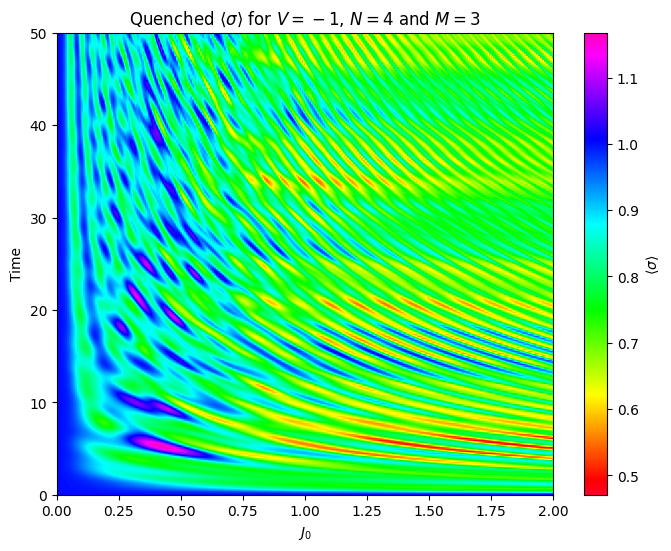

In [18]:
times = np.linspace(0, 50, 250)
final_J_strengths = np.linspace(0, 2, 250)

M = 3

for N in [4]:

    states, _ = enumerate_states(N, M)

    # positive V
    """
    V = 1

    sigma_matrix = np.zeros((len(times), len(final_J_strengths)))

    for j_idx, final_J_strength in enumerate(final_J_strengths):
        initial_hamiltonian = construct_hamiltonian(N, M, V=V, mu=0, J=0)
        quenched_hamiltonian = construct_hamiltonian(N, M, V=V, mu=0, J=final_J_strength)

        hamiltonians = [initial_hamiltonian] + [quenched_hamiltonian] * (len(times) - 1)

        energies, time_evolved_wavefunctions, state_probabilities, state_overlaps, true_energies, ground_state_manifold_overlaps = simulate_hamiltonian_time_evolution(
            hamiltonians, times)

        for t_idx, state in enumerate(time_evolved_wavefunctions):
            sigma_matrix[t_idx, j_idx] = sigma_ij(N//2-1, N//2, state, states, N, M)

    fig, ax = plt.subplots(figsize=(8, 6))
    c = ax.imshow(sigma_matrix, aspect='auto', origin='lower',
                extent=[final_J_strengths[0], final_J_strengths[-1], times[0], times[-1]],
                cmap='gist_rainbow')

    fig.colorbar(c, ax=ax, label=r'$\langle \sigma \rangle$')
    ax.set_title(f"Quenched $\langle \sigma \\rangle$ for $V = {V}$, $N = {N}$ and $M = {M}$")
    ax.set_xlabel(r'$J_0$')
    ax.set_ylabel("Time")"""
    
    # positive V

    V = -1

    sigma_matrix = np.zeros((len(times), len(final_J_strengths)))

    for j_idx, final_J_strength in enumerate(final_J_strengths):
        initial_hamiltonian = construct_hamiltonian(N, M, V=V, mu=0, J=0)
        quenched_hamiltonian = construct_hamiltonian(N, M, V=V, mu=0, J=final_J_strength)

        hamiltonians = [initial_hamiltonian] + [quenched_hamiltonian] * (len(times) - 1)

        energies, time_evolved_wavefunctions, state_probabilities, state_overlaps, true_energies, ground_state_manifold_overlaps = simulate_hamiltonian_time_evolution(
            hamiltonians, times)

        for t_idx, state in enumerate(time_evolved_wavefunctions):
            sigma_matrix[t_idx, j_idx] = sigma_ij(N//2-1, N//2, state, states, N, M)

    fig, ax = plt.subplots(figsize=(8, 6))
    c = ax.imshow(sigma_matrix, aspect='auto', origin='lower',
                extent=[final_J_strengths[0], final_J_strengths[-1], times[0], times[-1]],
                cmap='gist_rainbow')

    fig.colorbar(c, ax=ax, label=r'$\langle \sigma \rangle$')
    ax.set_title(f"Quenched $\langle \sigma \\rangle$ for $V = {V}$, $N = {N}$ and $M = {M}$")
    ax.set_xlabel(r'$J_0$')
    ax.set_ylabel("Time")
